<a href="https://colab.research.google.com/github/pauNancy21/Tareas-Ciencia-Datos/blob/main/C%C3%B3digo_fuente_ASE_I_NPGR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alumna: Nancy Paulina González Reyes

No. de cuenta: 217374-6

In [94]:
#Se instalan las librerías que se van a utilizar
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
#Se importan las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io as io
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import scipy.cluster.hierarchy as sch
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [96]:
#Cargar los archivos
from google.colab import files
uploaded = files.upload()

Saving Análisis de la violencia y abusos sexuales en el sistema de metro de la CDMX (2).csv to Análisis de la violencia y abusos sexuales en el sistema de metro de la CDMX (2) (2).csv
Saving Análisis de violencia hacia las mujeres en el metro.csv to Análisis de violencia hacia las mujeres en el metro (1).csv


In [97]:
#Leer los archivos
violenciametro = pd.read_csv(io.BytesIO(uploaded['Análisis de la violencia y abusos sexuales en el sistema de metro de la CDMX (2).csv']), sep = ',')
encuestaviolencia = pd.read_csv(io.BytesIO(uploaded['Análisis de violencia hacia las mujeres en el metro.csv']), sep = ',')
# Forma de los datos
print('Base shape: ', violenciametro.shape)
print('Encuesta shape: ', encuestaviolencia.shape)

Base shape:  (259, 12)
Encuesta shape:  (54, 11)


In [98]:
# Se crea una secuencia de DataFrame 
frames = [violenciametro, encuestaviolencia]
#Se concatenan los archivos
datos = pd.concat(frames, sort = False)
datos

,estacion,linea,dia,hora-inicio-reporte,hora-fin-reporte,descripcion,delito,sexo-victima,edad-victima,sexo-agresor,...,edad,estacion frecuente,Estacion,horario,capacidad del metro,reaccion,denuncio,razon,sexo agresor,edad agresor
0,SAN PEDRO DE LOS PINOS,7,MARTES,19:30,00:46,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,23.0,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OCEANÍA,5,JUEVES,14:01,19:30,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,31.0,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MERCED,1,LUNES,09:43,10:15,TOCAMIENTO EN GENITALES,ABUSO SEXUAL,HOMBRE,18.0,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SANTA ANITA,8,LUNES,14:55,21:40,TOMA DE FOTOGRAFÍAS,ACOSO SEXUAL,MUJER,27.0,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INSURGENTES,1,LUNES,16:36,17:35,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,24.0,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,NaN,NaN,NaN,NaN,NaN,NaN,Acoso físico ;,NaN,NaN,NaN,...,29.0,"Tacubaya, Universidad",Tacubaya,La mañana ;,Estaba lleno,No sabía que hacer,No,No sabía como,HOMBRE,38.0
50,NaN,NaN,NaN,NaN,NaN,NaN,Acoso visual;Acoso verbal ;,NaN,NaN,NaN,...,32.0,"El rosario, Observatorio",Pino Suárez,La mañana ;,Estaba vacío,Incomodidad,No,No lo sentí peligroso,HOMBRE,32.0
51,NaN,NaN,NaN,NaN,NaN,NaN,Acoso físico ;,NaN,NaN,NaN,...,35.0,"Tacubaya, Constituyentes",Pino Suárez,La tarde ;,Estaba lleno,Incomodidad,No,No supe quién fue,HOMBRE,34.0
52,NaN,NaN,NaN,NaN,NaN,NaN,Acoso visual;Acoso verbal ;,NaN,NaN,NaN,...,21.0,"Pino Suárez, Pantitlan, Ciudad Azteca",Pantitlan,La mañana ;,Estaba vacío,"Asco, Ignorancia",No,Lo ignore,MUJER,43.0


In [99]:
# Forma de los datos
print('Datos shape: ', datos.shape)
# Mostrar las primeros 4 filas del DataFrame concatenado
datos.head(5)

Datos shape:  (313, 22)


,estacion,linea,dia,hora-inicio-reporte,hora-fin-reporte,descripcion,delito,sexo-victima,edad-victima,sexo-agresor,...,edad,estacion frecuente,Estacion,horario,capacidad del metro,reaccion,denuncio,razon,sexo agresor,edad agresor
0,SAN PEDRO DE LOS PINOS,7,MARTES,19:30,00:46,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,23.0,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OCEANÍA,5,JUEVES,14:01,19:30,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,31.0,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MERCED,1,LUNES,09:43,10:15,TOCAMIENTO EN GENITALES,ABUSO SEXUAL,HOMBRE,18.0,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SANTA ANITA,8,LUNES,14:55,21:40,TOMA DE FOTOGRAFÍAS,ACOSO SEXUAL,MUJER,27.0,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INSURGENTES,1,LUNES,16:36,17:35,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,24.0,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
datos.tail(5)

,estacion,linea,dia,hora-inicio-reporte,hora-fin-reporte,descripcion,delito,sexo-victima,edad-victima,sexo-agresor,...,edad,estacion frecuente,Estacion,horario,capacidad del metro,reaccion,denuncio,razon,sexo agresor,edad agresor
49,NaN,NaN,NaN,NaN,NaN,NaN,Acoso físico ;,NaN,NaN,NaN,...,29.0,"Tacubaya, Universidad",Tacubaya,La mañana ;,Estaba lleno,No sabía que hacer,No,No sabía como,HOMBRE,38.0
50,NaN,NaN,NaN,NaN,NaN,NaN,Acoso visual;Acoso verbal ;,NaN,NaN,NaN,...,32.0,"El rosario, Observatorio",Pino Suárez,La mañana ;,Estaba vacío,Incomodidad,No,No lo sentí peligroso,HOMBRE,32.0
51,NaN,NaN,NaN,NaN,NaN,NaN,Acoso físico ;,NaN,NaN,NaN,...,35.0,"Tacubaya, Constituyentes",Pino Suárez,La tarde ;,Estaba lleno,Incomodidad,No,No supe quién fue,HOMBRE,34.0
52,NaN,NaN,NaN,NaN,NaN,NaN,Acoso visual;Acoso verbal ;,NaN,NaN,NaN,...,21.0,"Pino Suárez, Pantitlan, Ciudad Azteca",Pantitlan,La mañana ;,Estaba vacío,"Asco, Ignorancia",No,Lo ignore,MUJER,43.0
53,NaN,NaN,NaN,NaN,NaN,NaN,Acoso físico ;Acoso visual;,NaN,NaN,NaN,...,32.0,"Chapultepec, Auditorio, Pino Suarez",Bellas Artes,Las horas pico del metro;,Estaba lleno,Coraje \n,No,Había mucha gente y se alejó,HOMBRE,51.0


In [101]:
#tipo de datos
datos.dtypes

estacion                object
linea                   object
dia                     object
hora-inicio-reporte     object
hora-fin-reporte        object
descripcion             object
delito                  object
sexo-victima            object
edad-victima           float64
sexo-agresor            object
edad-agresor           float64
sin-detenido            object
edad                   float64
estacion frecuente      object
Estacion                object
horario                 object
capacidad del metro     object
reaccion                object
denuncio                object
razon                   object
sexo agresor            object
edad agresor           float64
dtype: object

In [102]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 0 to 53
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   estacion             259 non-null    object 
 1   linea                259 non-null    object 
 2   dia                  259 non-null    object 
 3   hora-inicio-reporte  259 non-null    object 
 4   hora-fin-reporte     259 non-null    object 
 5   descripcion          259 non-null    object 
 6   delito               313 non-null    object 
 7   sexo-victima         259 non-null    object 
 8   edad-victima         259 non-null    float64
 9   sexo-agresor         259 non-null    object 
 10  edad-agresor         259 non-null    float64
 11  sin-detenido         9 non-null      object 
 12  edad                 54 non-null     float64
 13  estacion frecuente   54 non-null     object 
 14  Estacion             41 non-null     object 
 15  horario              54 non-null     obje

In [103]:
datos.describe()

,edad-victima,edad-agresor,edad,edad agresor
count,259.000000,259.000000,54.000000,54.000000
mean,26.926641,36.667954,32.296296,34.518519
std,9.808161,12.461638,13.360925,12.179074
min,1.000000,16.000000,16.000000,18.000000
25%,20.000000,27.500000,21.500000,25.000000
50%,25.000000,35.000000,28.500000,32.000000
75%,31.000000,45.000000,37.250000,39.750000
max,84.000000,73.000000,70.000000,72.000000


In [104]:
# Checar los datos con valores NA 
datos_NA = datos.isna().sum()
violenciametro_NA = datos.isna().sum()
encuestaviolencia_NA = datos.isna().sum()

pd.concat([violenciametro_NA, encuestaviolencia_NA, datos_NA], axis=1, sort = False, keys = ['Violencia NA', 'Encuesta NA', 'Datos NA'])

,Violencia NA,Encuesta NA,Datos NA
estacion,54,54,54
linea,54,54,54
dia,54,54,54
hora-inicio-reporte,54,54,54
hora-fin-reporte,54,54,54
descripcion,54,54,54
delito,0,0,0
sexo-victima,54,54,54
edad-victima,54,54,54
sexo-agresor,54,54,54


In [105]:
#Mostrar el por ciento de los datos faltantes 
for column in datos.columns:
    percentage = datos[column].isnull().mean()
    print(f"{column}: {round(percentage*100, 2)}%")

estacion: 17.25%
linea: 17.25%
dia: 17.25%
hora-inicio-reporte: 17.25%
hora-fin-reporte: 17.25%
descripcion: 17.25%
delito: 0.0%
sexo-victima: 17.25%
edad-victima: 17.25%
sexo-agresor: 17.25%
edad-agresor: 17.25%
sin-detenido: 97.12%
edad: 82.75%
estacion frecuente: 82.75%
Estacion: 86.9%
horario: 82.75%
capacidad del metro: 82.75%
reaccion: 83.07%
denuncio: 82.75%
razon : 87.54%
sexo agresor: 82.75%
edad agresor : 82.75%


In [106]:
#Mejor visualización
datos.isnull().sum().sort_values(ascending=False)

sin-detenido           304
razon                  274
Estacion               272
reaccion               260
edad                   259
sexo agresor           259
denuncio               259
capacidad del metro    259
horario                259
estacion frecuente     259
edad agresor           259
linea                   54
edad-agresor            54
sexo-agresor            54
edad-victima            54
sexo-victima            54
descripcion             54
hora-fin-reporte        54
hora-inicio-reporte     54
dia                     54
estacion                54
delito                   0
dtype: int64

In [147]:
#Eliminación de filas o columnas
no_detenido = datos[datos["sin-detenido"].isnull()].index
datos_clear = datos.drop(no_detenido, axis=0) 

no_linea= datos.dropna(subset = ["dia"], axis = 0)

no_dia = datos[datos["dia"].isnull()].index
datos_clear = datos.drop(no_dia, axis=0) 

In [161]:
#Sustitur los valores por la moda
#La moda reemplaza los datos categóricos
mode = "".join(datos["Estacion"].mode())
datos["Estacion"].fillna(mode, inplace=True)

mode = "".join(datos["estacion"].mode())
datos["estacion"].fillna(mode, inplace=True)

mode = "".join(datos["reaccion"].mode())
datos["reaccion"].fillna(mode, inplace=True)

mode = "".join(datos["estacion frecuente"].mode())
datos["estacion frecuente"].fillna(mode, inplace=True)

mode = "".join(datos["horario"].mode())
datos["horario"].fillna(mode, inplace=True)

mode = "".join(datos["capacidad del metro"].mode())
datos["capacidad del metro"].fillna(mode, inplace=True)

mode = "".join(datos["denuncio"].mode())
datos["denuncio"].fillna(mode, inplace=True)

mode = "".join(datos["sexo agresor"].mode())
datos["sexo agresor"].fillna(mode, inplace=True)

mode = "".join(datos["denuncio"].mode())
datos["denuncio"].fillna(mode, inplace=True)

mode = "".join(datos["sexo-agresor"].mode())
datos["sexo-agresor"].fillna(mode, inplace=True)

mode = "".join(datos["sexo-victima"].mode())
datos["sexo-victima"].fillna(mode, inplace=True)

mode = "".join(datos["hora-inicio-reporte"].mode())
datos["hora-inicio-reporte"].fillna(mode, inplace=True)

#mode = "".join(datos["hora-fin-reporte"].mode())
#datos["hora-fin-reporte"].fillna(mode, inplace=True)

In [162]:
#Sustitur los valores por la media
#La media reemplaza los datos numéricos

mean = (datos["edad-victima"].mean())
datos["edad-victima"].fillna(mean, inplace=True)

mean = (datos["edad"].mean())
datos["edad"].fillna(mean, inplace=True)


In [163]:
datos.head(5)

,estacion,linea,dia,hora-inicio-reporte,hora-fin-reporte,descripcion,delito,sexo-victima,edad-victima,sexo-agresor,...,edad,estacion frecuente,Estacion,horario,capacidad del metro,reaccion,denuncio,razon,sexo agresor,edad agresor
0,SAN PEDRO DE LOS PINOS,7,MARTES,19:30,00:46,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,23.0,HOMBRE,...,32.296296,Línea rosaMercedMixcoac Oceania,Tacubaya,La tarde ;,Estaba lleno,Miedo,No,NaN,HOMBRE,NaN
1,OCEANÍA,5,JUEVES,14:01,19:30,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,31.0,HOMBRE,...,32.296296,Línea rosaMercedMixcoac Oceania,Tacubaya,La tarde ;,Estaba lleno,Miedo,No,NaN,HOMBRE,NaN
2,MERCED,1,LUNES,09:43,10:15,TOCAMIENTO EN GENITALES,ABUSO SEXUAL,HOMBRE,18.0,HOMBRE,...,32.296296,Línea rosaMercedMixcoac Oceania,Tacubaya,La tarde ;,Estaba lleno,Miedo,No,NaN,HOMBRE,NaN
3,SANTA ANITA,8,LUNES,14:55,21:40,TOMA DE FOTOGRAFÍAS,ACOSO SEXUAL,MUJER,27.0,HOMBRE,...,32.296296,Línea rosaMercedMixcoac Oceania,Tacubaya,La tarde ;,Estaba lleno,Miedo,No,NaN,HOMBRE,NaN
4,INSURGENTES,1,LUNES,16:36,17:35,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,24.0,HOMBRE,...,32.296296,Línea rosaMercedMixcoac Oceania,Tacubaya,La tarde ;,Estaba lleno,Miedo,No,NaN,HOMBRE,NaN


In [164]:
datos.tail(5)

,estacion,linea,dia,hora-inicio-reporte,hora-fin-reporte,descripcion,delito,sexo-victima,edad-victima,sexo-agresor,...,edad,estacion frecuente,Estacion,horario,capacidad del metro,reaccion,denuncio,razon,sexo agresor,edad agresor
49,HIDALGO,NaN,NaN,09:00,15:3016:0016:4517:1018:55,NaN,Acoso físico ;,MUJER,26.926641,HOMBRE,...,29.0,"Tacubaya, Universidad",Tacubaya,La mañana ;,Estaba lleno,No sabía que hacer,No,No sabía como,HOMBRE,38.0
50,HIDALGO,NaN,NaN,09:00,15:3016:0016:4517:1018:55,NaN,Acoso visual;Acoso verbal ;,MUJER,26.926641,HOMBRE,...,32.0,"El rosario, Observatorio",Pino Suárez,La mañana ;,Estaba vacío,Incomodidad,No,No lo sentí peligroso,HOMBRE,32.0
51,HIDALGO,NaN,NaN,09:00,15:3016:0016:4517:1018:55,NaN,Acoso físico ;,MUJER,26.926641,HOMBRE,...,35.0,"Tacubaya, Constituyentes",Pino Suárez,La tarde ;,Estaba lleno,Incomodidad,No,No supe quién fue,HOMBRE,34.0
52,HIDALGO,NaN,NaN,09:00,15:3016:0016:4517:1018:55,NaN,Acoso visual;Acoso verbal ;,MUJER,26.926641,HOMBRE,...,21.0,"Pino Suárez, Pantitlan, Ciudad Azteca",Pantitlan,La mañana ;,Estaba vacío,"Asco, Ignorancia",No,Lo ignore,MUJER,43.0
53,HIDALGO,NaN,NaN,09:00,15:3016:0016:4517:1018:55,NaN,Acoso físico ;Acoso visual;,MUJER,26.926641,HOMBRE,...,32.0,"Chapultepec, Auditorio, Pino Suarez",Bellas Artes,Las horas pico del metro;,Estaba lleno,Coraje \n,No,Había mucha gente y se alejó,HOMBRE,51.0


Análisis Exploratorio de Datos

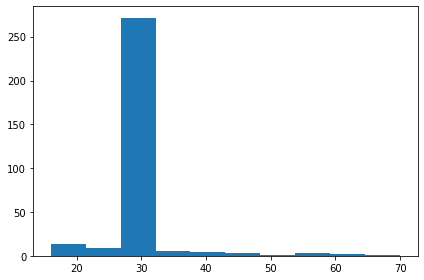

In [169]:
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.hist(datos["edad"].fillna(0).astype(int))
fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


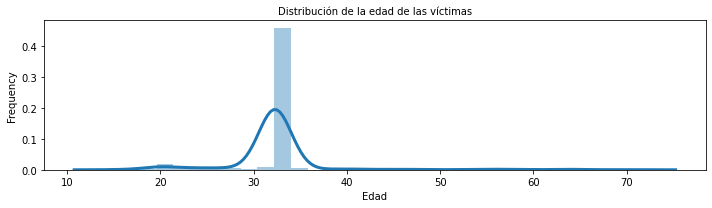

In [175]:
# set plot size
plt.figure(figsize=(10, 3))

# plot a univariate distribution of Age observations 
sns.distplot(datos[(datos[["edad","edad-victima"]] > 0)].edad, kde_kws={"lw": 3}, bins = 30)

# set titles and labels
plt.title('Distribución de la edad de las víctimas',fontsize= 10)
plt.xlabel('Edad')
plt.ylabel('Frequency')
# clean layout
plt.tight_layout()